In [4]:
!pip install opencv-python --quiet

In [3]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd
import cv2


ModuleNotFoundError: No module named 'cv2'

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2023-08-10 08:52:04--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-08-10 08:52:05--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-08-10 08:52:05--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
import zipfile

In [ ]:
with zipfile.ZipFile("/content/glove.6B.zip",'r') as f:
    f.extractall()

In [ ]:
embeddings_dict = {}
with open("glove.6B.50d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [ ]:
!wget https://vision.cs.hacettepe.edu.tr/files/recipeqa/train.json

--2023-09-22 05:53:16--  https://vision.cs.hacettepe.edu.tr/files/recipeqa/train.json
Resolving vision.cs.hacettepe.edu.tr (vision.cs.hacettepe.edu.tr)... 193.140.236.29
Connecting to vision.cs.hacettepe.edu.tr (vision.cs.hacettepe.edu.tr)|193.140.236.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 158656297 (151M) [application/json]
Saving to: ‘train.json’

train.json          100%[===================>] 151.31M  24.8MB/s    in 6.8s    

2023-09-22 05:53:24 (22.1 MB/s) - ‘train.json’ saved [158656297/158656297]



In [ ]:
import json

In [ ]:
with open("/content/train.json",'r') as f:
  data = json.load(f)

In [ ]:
import pandas as pd
df = pd.DataFrame(data)

In [ ]:
!wget https://vision.cs.hacettepe.edu.tr/files/recipeqa/images.zip

--2023-09-22 11:02:24--  https://vision.cs.hacettepe.edu.tr/files/recipeqa/images.zip
Resolving vision.cs.hacettepe.edu.tr (vision.cs.hacettepe.edu.tr)... 193.140.236.29
Connecting to vision.cs.hacettepe.edu.tr (vision.cs.hacettepe.edu.tr)|193.140.236.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2271690314 (2.1G) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]   2.12G  19.0MB/s    in 2m 6s   

2023-09-22 11:04:31 (17.2 MB/s) - ‘images.zip’ saved [2271690314/2271690314]



In [ ]:
import zipfile
with zipfile.ZipFile("/content/images.zip",'r') as f:
    f.extractall("/content/image")

In [ ]:
import os
len(os.listdir('/content/image/images-qa/train/images-qa'))

109024

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
# plt.imshow(image)

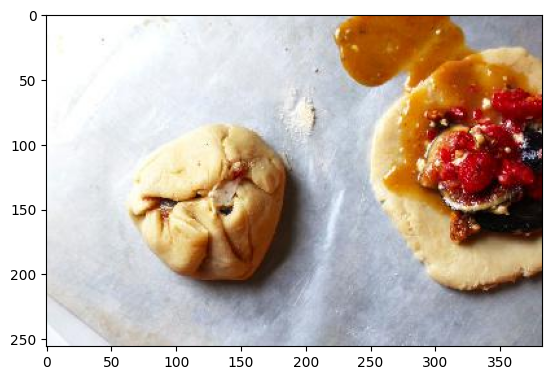

In [ ]:
image = np.flip(cv2.imread('/content/image/images-qa/train/images-qa/pocket-sized-raspberry-pie_6_0.jpg'),axis=-1)
plt.imshow(image)

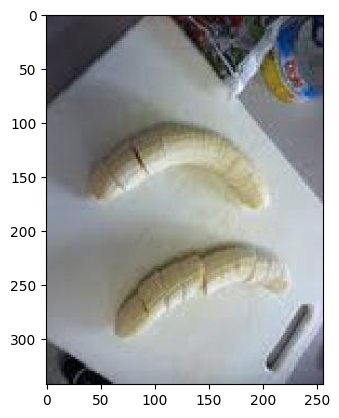

In [ ]:
image = np.flip(cv2.imread('/content/image/images-qa/train/images-qa/phantom-berry-smoothie_2_0.jpg'),axis=-1)
plt.imshow(image)

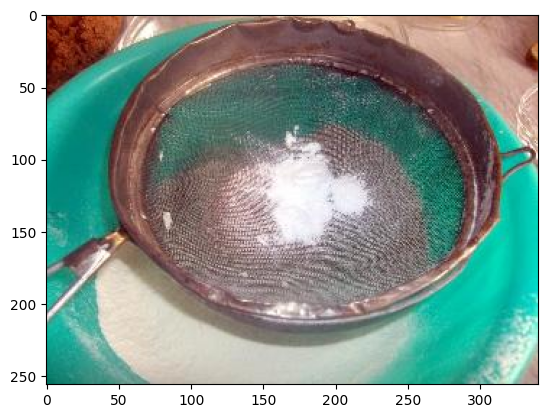

In [ ]:
image = np.flip(cv2.imread('/content/image/images-qa/train/images-qa/1-caramel-dumplings_2_1.jpg'),axis=-1)
plt.imshow(image)

In [ ]:
def text_to_vec(text):
    vec = np.zeros(50)
    for i in text.lower().split():
        if i in embeddings_dict:
            vec+=embeddings_dict[i]
    return vec/len(text.split())

In [ ]:
def
vectors_for_text = {}
for i in df.loc[0][0]['context']:
    vectors_for_text[i['body']] = text_to_vec(i['body'])

In [ ]:
for i in vectors_for_text:
    print(i,np.sum(vectors_for_text[i]*text_to_vec('peel the beans')))

3 until 5 whole vanilla beans250 gram of vegetable glycerin food gradeEvery 100 gram of vanilla beans have 35 until 40 of whole vanilla beans 10.057833926322102
Scrape Vanilla Beans and get the seeds into vegetable glycerin 11.674095356782388
Vanilla Beans Seed and Vegetable Glycerin 11.143262725088238
Whole Vanilla Beans put in a bottle with seeds and vegetable glycerin 11.465676177133025


In [ ]:
import os
images=set(os.listdir('/content/image/images-qa/train/images-qa'))

In [ ]:
# df1 =
# lis = []
# for i in range(len(df)):
#     # print(i,len(lis))
#     for k in df.loc[i][0]['context']:
#         new_instance = {}
#         new_instance['Recipe']=df.loc[i][0]['recipe_id']
#         try:
#             new_instance['title']=k['title']
#         except:
#             break
#         new_instance['body']=k['body']
#         path,ii=[],0
#         while True:
#             if new_instance['Recipe']+"_"+str(k['id'])+"_"+str(ii)+".jpg" in images:
#                 path.append(new_instance['Recipe']+"_"+str(k['id'])+"_"+str(ii)+".jpg")
#                 ii+=1
#             else: break
#         new_instance['id']=path
#         lis.append(new_instance)

In [ ]:
lis[0]

{'Recipe': 'how-to-make-halal-vanilla-extract',
 'title': 'Vanilla Beans Can Use With Vegetable Glycerin',
 'body': 'Whole Vanilla Beans put in a bottle with seeds and vegetable glycerin',
 'id': ['how-to-make-halal-vanilla-extract_4_0.jpg']}

In [ ]:
df2 = pd.DataFrame(lis)

In [ ]:
df2

,Recipe,title,body,id
0,how-to-make-halal-vanilla-extract,Ingredients Halal Vanilla Extract,3 until 5 whole vanilla beans250 gram of veget...,[how-to-make-halal-vanilla-extract_1_0.jpg]
1,how-to-make-halal-vanilla-extract,Scrape Vanilla Beans,Scrape Vanilla Beans and get the seeds into ve...,[how-to-make-halal-vanilla-extract_2_0.jpg]
2,how-to-make-halal-vanilla-extract,Vegetable Glycerin and Vanilla Beans,Vanilla Beans Seed and Vegetable Glycerin,[how-to-make-halal-vanilla-extract_3_0.jpg]
3,how-to-make-halal-vanilla-extract,Vanilla Beans Can Use With Vegetable Glycerin,Whole Vanilla Beans put in a bottle with seeds...,[how-to-make-halal-vanilla-extract_4_0.jpg]
4,zombie-poop,WHAT YOU NEED,Ingredients:-250 g dark chocolate;-2 dl wippin...,[zombie-poop_1_0.jpg]
...,...,...,...,...
145368,bacon-sushi,Making the Risotto Filling,"I once made risotto with sushi rice, since I h...",[]
145369,bacon-sushi,Jazzing Up the Risotto,"Risotto is a wonderfully customizable dish, an...",[]
145370,bacon-sushi,Rolling the Sushi,Cover the sushi rolling mat with a large piece...,[]
145371,bacon-sushi,Baking and Slicing,Preheat the oven to 350 degrees F. Place the a...,[]


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df2['embeding']=df2["body"].apply(text_to_vec)
# df2

In [ ]:
# Define the file path on your Google Drive
# file_path = '/content/drive/My Drive/recpie2video/videoQA.csv'

# # Save the DataFrame as a CSV file
# df2.to_csv(file_path, index=False)

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/recpie2video/videoQA.csv")
df1.head()

,Recipe,title,body,id,embeding
0,how-to-make-halal-vanilla-extract,Ingredients Halal Vanilla Extract,3 until 5 whole vanilla beans250 gram of veget...,['how-to-make-halal-vanilla-extract_1_0.jpg'],[ 0.00400372 0.097056 0.04448996 -0.012874...
1,how-to-make-halal-vanilla-extract,Scrape Vanilla Beans,Scrape Vanilla Beans and get the seeds into ve...,['how-to-make-halal-vanilla-extract_2_0.jpg'],[ 0.0209577 -0.243447 -0.08681859 0.021111...
2,how-to-make-halal-vanilla-extract,Vegetable Glycerin and Vanilla Beans,Vanilla Beans Seed and Vegetable Glycerin,['how-to-make-halal-vanilla-extract_3_0.jpg'],[-0.21757717 -0.20878734 -0.27114849 0.314142...
3,how-to-make-halal-vanilla-extract,Vanilla Beans Can Use With Vegetable Glycerin,Whole Vanilla Beans put in a bottle with seeds...,['how-to-make-halal-vanilla-extract_4_0.jpg'],[ 0.04246666 -0.00985 -0.26616783 0.066381...
4,zombie-poop,WHAT YOU NEED,Ingredients:-250 g dark chocolate;-2 dl wippin...,['zombie-poop_1_0.jpg'],[-0.18882445 0.21361294 -0.00624556 0.167927...


In [ ]:
df1.iloc[130:140]

NameError: ignored

In [ ]:
df = df1.drop(columns = [])

In [ ]:
image = np.flip(cv2.imread('/content/image/images-qa/train/images-qa/snow-globe-cocktail_5_0.jpg'),axis=-1)
plt.imshow(image)

## CLIP model

In [ ]:
 !conda install --yes -c pytorch pytorch=1.7.1 torchvision cudatoolkit=11.0
 !pip install ftfy regex tqdm
 !pip install git+https://github.com/openai/CLIP.git

In [ ]:
import torch
import clip
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)



In [ ]:
image = preprocess(Image.open("/content/image/images-qa/train/images-qa/1-caramel-dumplings_2_1.jpg")).unsqueeze(0).to(device)
text = clip.tokenize(["Vegetable", "flour", "fruit"]).to(device)

In [ ]:
with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)

    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print("Label probs:", probs)

In [ ]:



df1['body_embeding']=df1["embeding"].apply(lambda x: np.array(x[1:-1].split(), dtype='float32'))

In [ ]:
df1.iloc[0]['id']

"['how-to-make-halal-vanilla-extract_1_0.jpg']"

In [ ]:
np.sum(df1['body_embeding'][0]*text_to_vec("peel the beans"))

10.057833844675104

In [ ]:
def image_text_embeding(text):
  input_emb=text_to_vec(text)
  result=[[np.sum(df1.iloc[i]['body_embeding']*input_emb), df1.loc[i]['id']] for i in range(len(df1))]
  collection=sorted(result, key=lambda x: x[0], reverse=True)[:5]
  return collection

In [ ]:
collection=image_text_embeding("spill the beans, vegetable, peel")
col=[ i  for i in collection if i[1]!='[]']

In [ ]:
lis_collection=[eval(i[1])[0] for i in col]

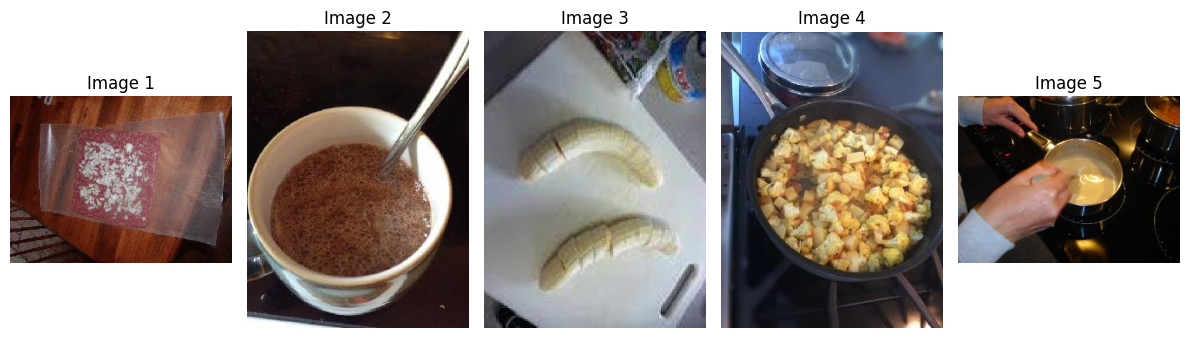

In [ ]:
num_images = len(lis_collection)
rows = 1
cols = num_images
fig, axes = plt.subplots(rows, cols, figsize=(12, 4))
for idx, (ax, filename) in enumerate(zip(axes, lis_collection)):
  image = cv2.imread("/content/image/images-qa/train/images-qa/"+str(filename))
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  ax.imshow(image_rgb)
  ax.set_title(f"Image {idx+1}")
  ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
df1.iloc[145372]

Recipe                                                 bacon-sushi
title                                             And You're Done!
body             Serve the sushi with a light crispy vegetable ...
id                                         ['bacon-sushi_7_0.jpg']
embeding         [ 1.65803621e-01  2.23667183e-01 -3.26872593e-...
body_embeding    [0.16580363, 0.22366719, -0.3268726, -0.092014...
Name: 145372, dtype: object

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/recpie2video/videoQA.csv")


In [ ]:
df.iloc[50:60]

,Recipe,title,body,id,embeding
50,cabbage-burger,Stuffing Ingredients,This is an approximate ratio 2 lbs of hamburge...,['cabbage-burger_3_0.jpg'],[ 0.14582799 0.25997879 -0.14283446 -0.014385...
51,cabbage-burger,Make the Stuffing,1. Brown the 2 lbs of hamburger in a large sto...,"['cabbage-burger_4_0.jpg', 'cabbage-burger_4_1...",[ 0.29165653 -0.02472596 -0.17541764 -0.108243...
52,cabbage-burger,Simmer the Stuffing,I do NOT drain the hamburger before I add the ...,['cabbage-burger_5_0.jpg'],[ 3.07208244e-01 3.55032990e-02 -4.48676506e-...
53,cabbage-burger,Prepare the Dough,1. Prepare the bread dough as called for by th...,"['cabbage-burger_6_0.jpg', 'cabbage-burger_6_1...",[ 5.85442139e-02 7.54881210e-02 1.17784046e-...
54,cabbage-burger,Prepare the Pan,"1. For this appetizer, I use a mini-muffin pan...",['cabbage-burger_7_0.jpg'],[ 0.24789837 0.10585442 -0.12525011 -0.094304...
55,cabbage-burger,Fill the Dough,1. After the cabbage burger filling has suffic...,"['cabbage-burger_8_0.jpg', 'cabbage-burger_8_1...",[ 1.36065302e-01 3.87594489e-02 8.64054682e-...
56,cabbage-burger,Embellish and Enjoy,Bake at 350 for 15 minutes or until tops are g...,['cabbage-burger_9_0.jpg'],[ 2.70996794e-01 2.29147707e-01 6.24087720e-...
57,filled-meat-loaf-with-bacon-jacket,Ingredients,First of all collect the following ingredients...,['filled-meat-loaf-with-bacon-jacket_1_0.jpg'],[ 2.74193347e-01 6.41081565e-02 -4.24515249e-...
58,filled-meat-loaf-with-bacon-jacket,Preparing the Minced Meat,"Put the minced meat in a bowl and add salt, pe...",['filled-meat-loaf-with-bacon-jacket_2_0.jpg'],[-0.07858818 0.14605135 -0.25175941 0.054544...
59,filled-meat-loaf-with-bacon-jacket,Filling Up,Once the meat is spiced put it on a oven paper...,"['filled-meat-loaf-with-bacon-jacket_3_0.jpg',...",[ 3.03925226e-01 5.70369407e-02 -9.60133210e-...


## read the images and thier context

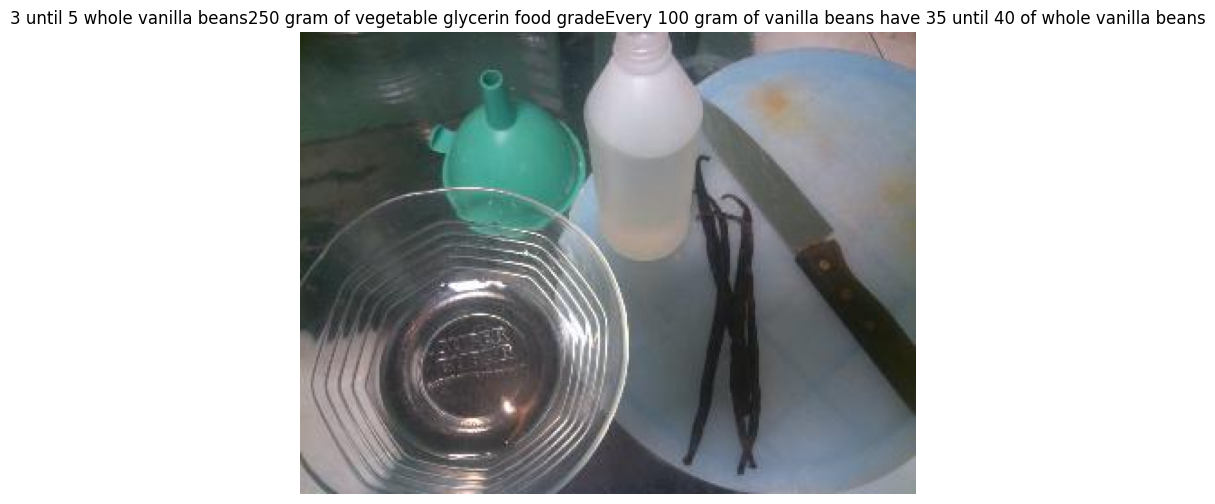

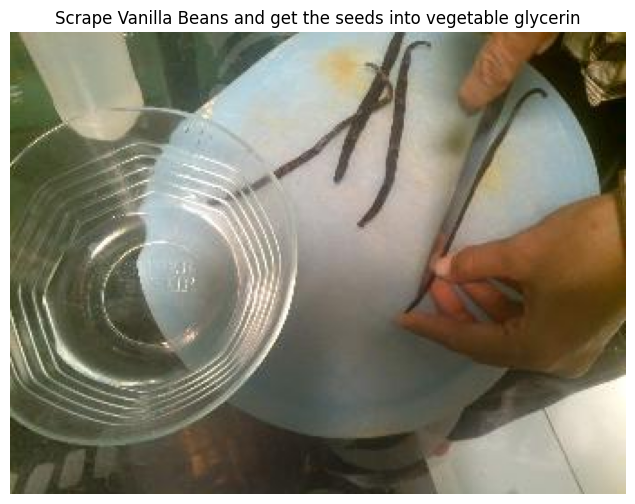

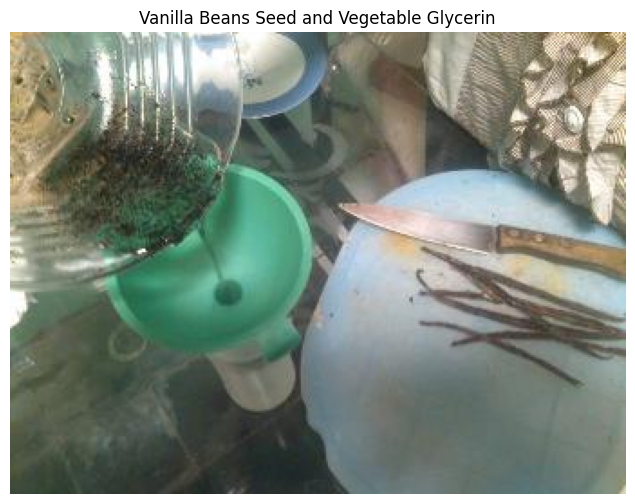

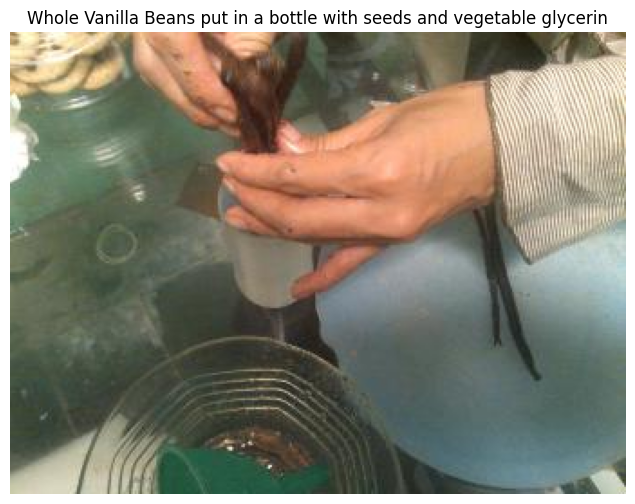

In [ ]:
for i in range(4):
  if df.iloc[i]['id'] == '[]': continue
  path ="/content/image/images-qa/train/images-qa/"+str(eval(df.iloc[i]['id'])[0])
  image = Image.open(path)
  image_array = plt.imread(path)
  plt.figure(figsize=(8, 6))  # You can adjust the figure size as needed
  plt.imshow(image_array)
  # Customize the plot (optional)
  plt.title(df.iloc[i]['body'])
  plt.axis('off')  # Turn off axis labels and ticks
  plt.show()


In [ ]:
.# df.iloc[14]['id']
eval(df.iloc[14]['id'])[0]

'zombie-poop_11_0.jpg'

## dataframe modification

In [ ]:
df.head()

,Recipe,title,body,id,embeding
0,how-to-make-halal-vanilla-extract,Ingredients Halal Vanilla Extract,3 until 5 whole vanilla beans250 gram of veget...,['how-to-make-halal-vanilla-extract_1_0.jpg'],[ 0.00400372 0.097056 0.04448996 -0.012874...
1,how-to-make-halal-vanilla-extract,Scrape Vanilla Beans,Scrape Vanilla Beans and get the seeds into ve...,['how-to-make-halal-vanilla-extract_2_0.jpg'],[ 0.0209577 -0.243447 -0.08681859 0.021111...
2,how-to-make-halal-vanilla-extract,Vegetable Glycerin and Vanilla Beans,Vanilla Beans Seed and Vegetable Glycerin,['how-to-make-halal-vanilla-extract_3_0.jpg'],[-0.21757717 -0.20878734 -0.27114849 0.314142...
3,how-to-make-halal-vanilla-extract,Vanilla Beans Can Use With Vegetable Glycerin,Whole Vanilla Beans put in a bottle with seeds...,['how-to-make-halal-vanilla-extract_4_0.jpg'],[ 0.04246666 -0.00985 -0.26616783 0.066381...
4,zombie-poop,WHAT YOU NEED,Ingredients:-250 g dark chocolate;-2 dl wippin...,['zombie-poop_1_0.jpg'],[-0.18882445 0.21361294 -0.00624556 0.167927...


In [ ]:
df_new = df[df['id']!= '[]']

In [ ]:
df_new['id'] = df_new['id'].apply(eval())

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/recpie2video/videoQA.csv")
df.head()

,Recipe,title,body,id,embeding
0,how-to-make-halal-vanilla-extract,Ingredients Halal Vanilla Extract,3 until 5 whole vanilla beans250 gram of veget...,['how-to-make-halal-vanilla-extract_1_0.jpg'],[ 0.00400372 0.097056 0.04448996 -0.012874...
1,how-to-make-halal-vanilla-extract,Scrape Vanilla Beans,Scrape Vanilla Beans and get the seeds into ve...,['how-to-make-halal-vanilla-extract_2_0.jpg'],[ 0.0209577 -0.243447 -0.08681859 0.021111...
2,how-to-make-halal-vanilla-extract,Vegetable Glycerin and Vanilla Beans,Vanilla Beans Seed and Vegetable Glycerin,['how-to-make-halal-vanilla-extract_3_0.jpg'],[-0.21757717 -0.20878734 -0.27114849 0.314142...
3,how-to-make-halal-vanilla-extract,Vanilla Beans Can Use With Vegetable Glycerin,Whole Vanilla Beans put in a bottle with seeds...,['how-to-make-halal-vanilla-extract_4_0.jpg'],[ 0.04246666 -0.00985 -0.26616783 0.066381...
4,zombie-poop,WHAT YOU NEED,Ingredients:-250 g dark chocolate;-2 dl wippin...,['zombie-poop_1_0.jpg'],[-0.18882445 0.21361294 -0.00624556 0.167927...


In [ ]:
df = df.drop(columns = ['embeding'])

In [ ]:
df = df[df['id']!= '[]']

In [ ]:
print(len(df))
df = df.drop_duplicates()
print(len(df))

127975
39247


In [ ]:
df[df['Recipe'] == 'zombie-poop']

,Recipe,title,body,id
4,zombie-poop,WHAT YOU NEED,Ingredients:-250 g dark chocolate;-2 dl wippin...,['zombie-poop_1_0.jpg']
5,zombie-poop,MELT THE CHOCOLATE,"Melt the chocolate ""bain mairie"", let it cool ...",['zombie-poop_2_0.jpg']
8,zombie-poop,WHIP THE EGG WHITES,"Whip the egg whites with a pinch of salt, unti...",['zombie-poop_5_0.jpg']
10,zombie-poop,MIX...,Mix the whipped cream with the yolks+chocolate.,['zombie-poop_7_0.jpg']
11,zombie-poop,MIX...,Mix the white of the egg with the rest of the ...,['zombie-poop_8_0.jpg']
13,zombie-poop,FORM THE POOPS,Form the poops :)Take out the frozen poop from...,['zombie-poop_10_0.jpg']
14,zombie-poop,DECORATING,Decore the poops with bones and fingers…or wha...,['zombie-poop_11_0.jpg']


In [ ]:
df.iloc[53]['body']

'Now dust your cookie surface, roll out some dough about 1/4" thick  and cut some police box shapes!I always have help from a companion or 2.This dough recipe I used baked them perfect without much shape change! bonus!Here\'s the recipe I used:2 cups all-purpose flour, plus more for rolling 1/2 teaspoon baking powder                1/4 teaspoon salt 1/2 cup (1 stick) unsalted butter, room temperature                1 cup granulated sugar 1 large egg                1 teaspoon vanilla extract               Mix, separate into 2 balls...press into disks...and place in a ziploc bag and set in the fridge for 2 hours...or the freezer for about 20 minutes.Then remove, roll out on floured surface and bake 325 for about 12 minutes.Let them cool completely.Now just add frosting! Royal icing would be the cutest!  But it doesn\'t set up right for me in the humid humid south...so I just used buttercream and drew on some swirls!'

In [ ]:
df.iloc[56]['body']

'Ingredients \xa01. Wash* your berries. Lay your berries onto a baking sheet and use a potato masher to crush them. Measure 4 cups and place into a large sauce pot. \xa0 2. Combine berries, butter, pectin and lemon juice. Measure agave nectar or sugar and set aside.\xa0 Equipment 1. Place your canning rack in the bottom of your pot. Place your jars into your pot and cover with water. Bring to a simmer (180 F/ 82 C). 2. Set screw bands aside. Heat snap lids in hot water (not boiling). Keep both hot until ready to use. \xa0 * I washed my berries with a small about of lemon juice to help remove any impurities. I additionally washed them twice as they came from my backyard and had some ants hanging about.\xa0 '

In [ ]:
df.iloc[56]['id']

"['how-to-mixed-berry-jam-diabetic-friendly_2_0.jpg', 'how-to-mixed-berry-jam-diabetic-friendly_2_1.jpg', 'how-to-mixed-berry-jam-diabetic-friendly_2_2.jpg', 'how-to-mixed-berry-jam-diabetic-friendly_2_3.jpg', 'how-to-mixed-berry-jam-diabetic-friendly_2_4.jpg', 'how-to-mixed-berry-jam-diabetic-friendly_2_5.jpg']"

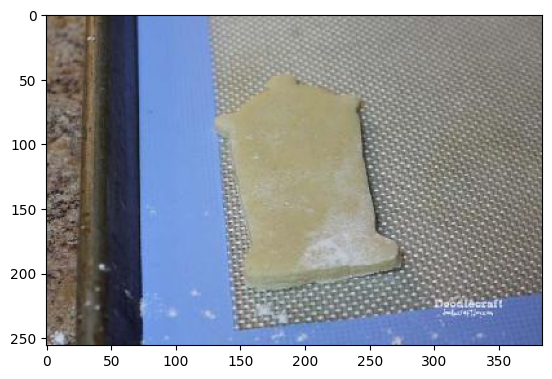

In [ ]:
image = np.flip(cv2.imread('/content/image/images-qa/train/images-qa/tardis-cookie-cutter-diy-and-sugar-cookies_3_2.jpg'),axis=-1)
plt.imshow(image)

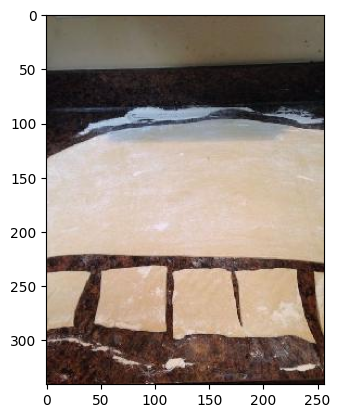

In [ ]:
image = np.flip(cv2.imread('/content/image/images-qa/train/images-qa/cabbage-burger_6_1.jpg'),axis=-1)
plt.imshow(image)